In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import markers

In [24]:
sns.set_style('whitegrid')
all_shapes = list(markers.MarkerStyle.markers.keys())

# Grabbing homelessness data

In [3]:
raw_data = pd.read_csv('../data/overall_homelessness.csv', header=None)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       58 non-null     object
 1   1       58 non-null     object
 2   2       58 non-null     object
 3   3       58 non-null     object
 4   4       58 non-null     object
 5   5       58 non-null     object
 6   6       58 non-null     object
 7   7       58 non-null     object
 8   8       58 non-null     object
 9   9       58 non-null     object
 10  10      58 non-null     object
 11  11      58 non-null     object
dtypes: object(12)
memory usage: 5.6+ KB


In [5]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,State
1,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949,AK
2,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351,AL
3,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366,AR
4,,,,,,,,,,,,AS


In [6]:
# Assign state abbreviation as column names
df = raw_data.copy()
df = df.replace(" ", 0, regex=True)
df.columns = df.iloc[0]
df = df.drop(labels=[0, 4, 57], axis=0)
df.reset_index(inplace=True, drop=True)

In [7]:
df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,State
0,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949,AK
1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351,AL
2,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366,AR
3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979,AZ
4,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548,CA


In [8]:
df.set_index('State', inplace=True)
df = df.rename_axis("Year", axis="columns")

In [9]:
# Change data from object to numeric values
df = df.apply(lambda x: x.astype('int')) 

In [10]:
df.head()

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
AL,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
AR,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
AZ,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
CA,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


# Visualizations

## Top 10 States Overall Homeless population from 2010 - 2020

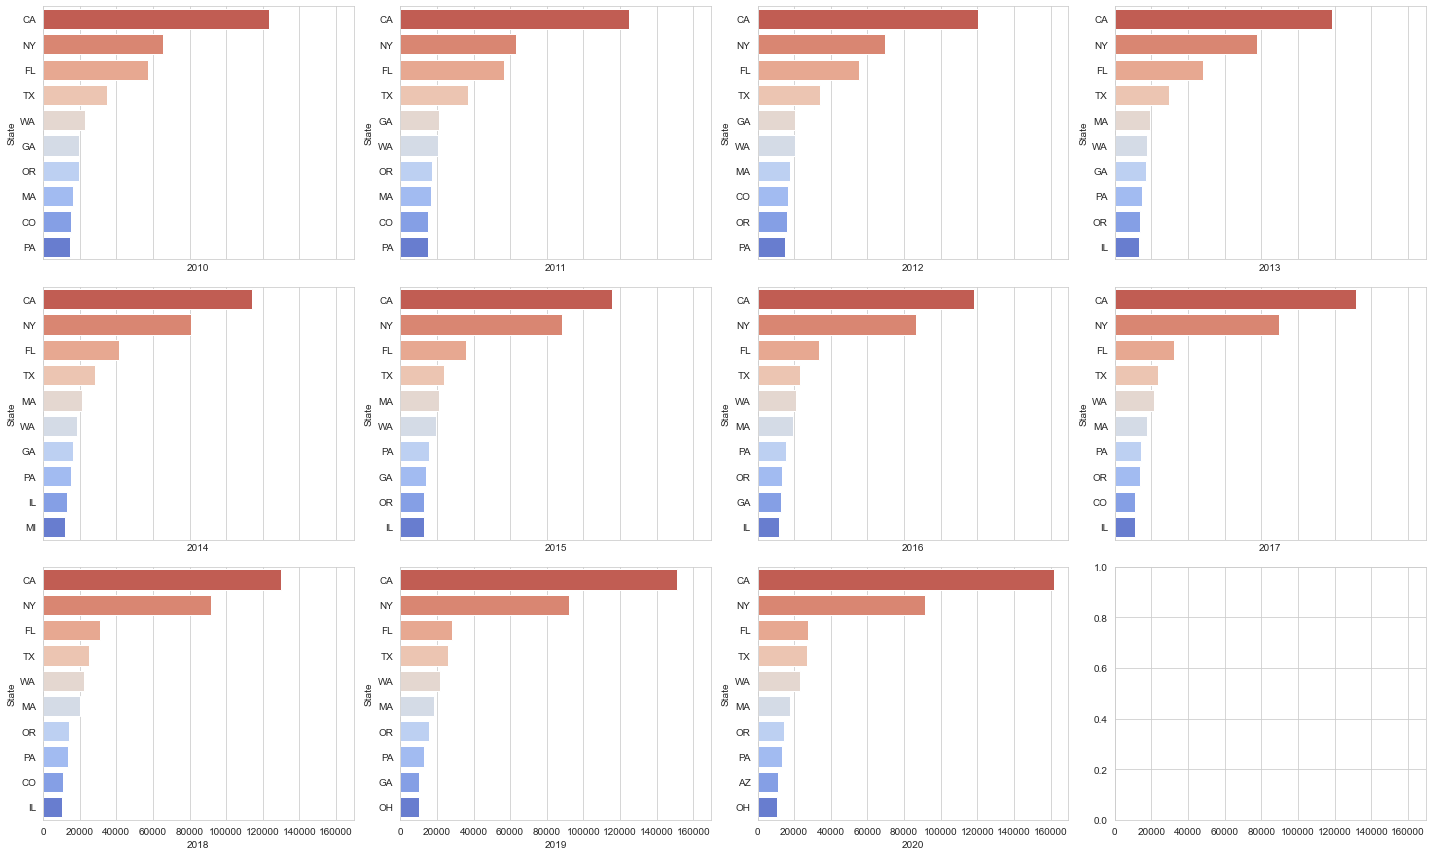

In [11]:
n_years = len(df.columns)

if n_years % 2 != 0:
    n_years = n_years + 1

fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True)
for year, ax in zip(df.columns, axes.ravel()):
    df2 = df.sort_values(year, ascending=False).head(10)
    _ = sns.barplot(y=df2.index, x=year, data=df2, 
                    palette="coolwarm_r", ax=ax, orient="h")
plt.tight_layout()

## Top 10 States overall homelessness in the last 10 years

In [12]:
df.sort_values(by='2010', ascending=True).head(10).index.to_list()

['MP', 'VI', 'WY', 'SD', 'ND', 'DE', 'VT', 'RI', 'NH', 'MT']

In [13]:
list_top_states = []
for year in df.columns:
    list_top_states.extend(df.sort_values(by=year, ascending=False).head(10).index.to_list())

top_states = list(set(list_top_states))

In [14]:
top_states_df = df.loc[top_states]

In [15]:
top_states_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
MI,13058,13185,12592,11527,12227,10516,9316,9051,8351,8575,8638
IL,14395,14009,14144,13425,13107,13177,11590,10798,10643,10199,10431
PA,14516,15096,14736,15086,15333,15421,15339,14138,13512,13199,13375
CA,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548
OH,12569,13030,13977,12325,11823,11182,10404,10095,10249,10345,10655
WA,22878,20439,20504,17760,18442,19419,20827,21112,22304,21577,22923
GA,19836,20975,20516,16971,16521,13790,12909,10174,9499,10443,10234
MA,16646,16664,17501,19029,21237,21135,19608,17565,20068,18471,17975
OR,19492,17254,15828,13822,12164,13226,13238,13953,14476,15876,14655


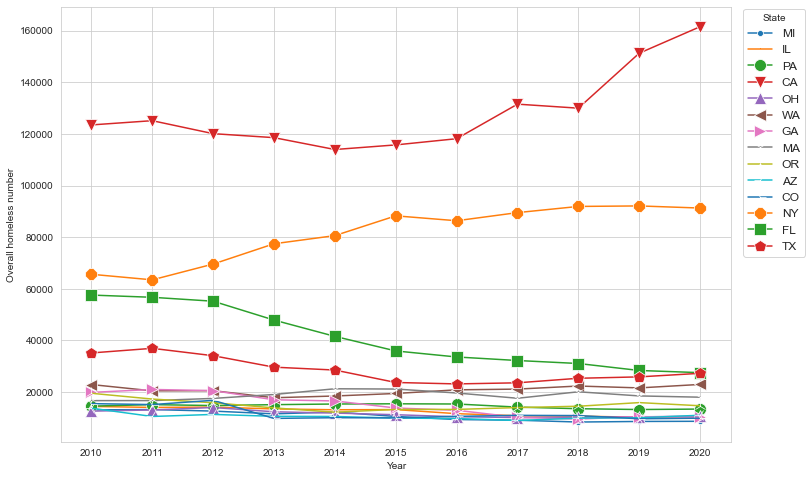

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, state in enumerate(top_states_df.index.to_list()):
    _ = sns.lineplot(data=top_states_df.loc[state],
                     palette='tab20',
                     marker=all_shapes[i], markersize=12)

ax.set_ylabel('Overall homeless number')
ax.legend(labels=top_states_df.index.to_list(), title = "State", 
           fontsize = 'large', title_fontsize = "10", 
         bbox_to_anchor=(1.01, 1.01), loc="upper left")

In [43]:
out_state = ['CA', 'NY', 'FL']
new_top_states = [i for i in top_states_df.index.to_list() if i not in out_state]

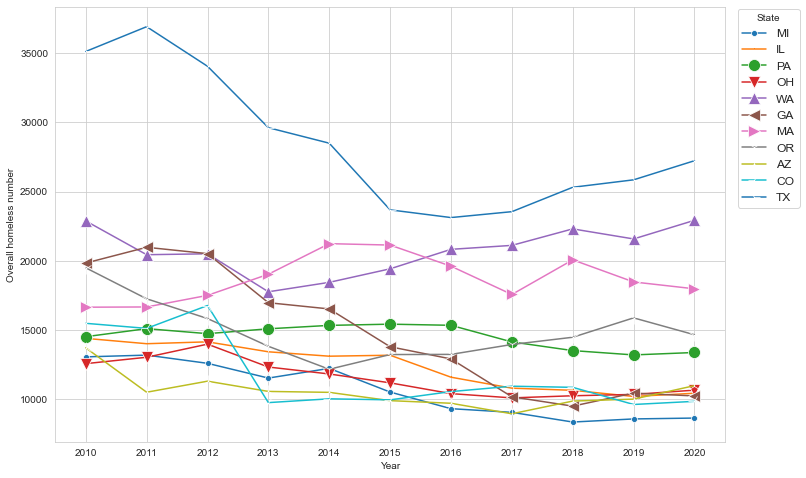

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, state in enumerate(new_top_states):
    _ = sns.lineplot(data=top_states_df.loc[state],
                     palette='tab20',
                     marker=all_shapes[i], markersize=12)

ax.set_ylabel('Overall homeless number')
ax.legend(labels=new_top_states, title = "State", 
           fontsize = 'large', title_fontsize = "10", 
         bbox_to_anchor=(1.01, 1.01), loc="upper left")